In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.fftpack import fft2, fftshift
from PIL import Image

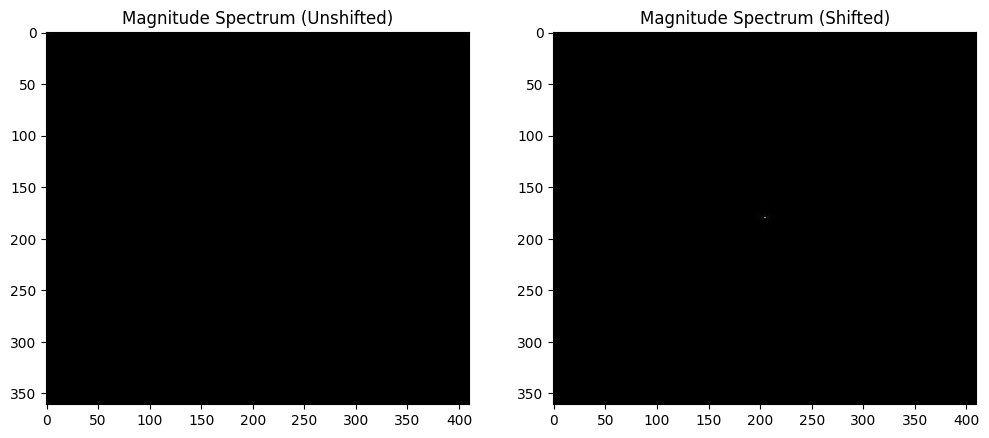

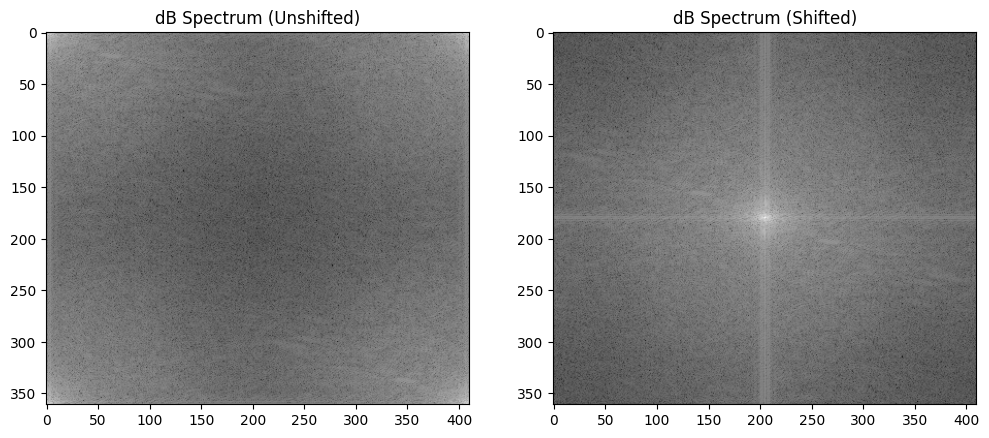

In [101]:
img = cv2.imread('dog_gray.jpg', 0)

# 2D FFT
F = np.fft.fft2(img)
F_mag = np.abs(F)
F_mag_db = 20 * np.log(np.abs(F) + 1e-10)

# Shift low frequencies to center
F_shift = np.fft.fftshift(F)
F_shift_mag = np.abs(F_shift)
F_shift_mag_db = 20 * np.log(F_shift_mag + 1e-10)

# Plot
plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(F_mag, cmap='gray'); plt.title("Magnitude Spectrum (Unshifted)")
plt.subplot(122); plt.imshow(F_shift_mag, cmap='gray'); plt.title("Magnitude Spectrum (Shifted)")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(F_mag_db, cmap='gray'); plt.title("dB Spectrum (Unshifted)")
plt.subplot(122); plt.imshow(F_shift_mag_db, cmap='gray'); plt.title("dB Spectrum (Shifted)")
plt.show()


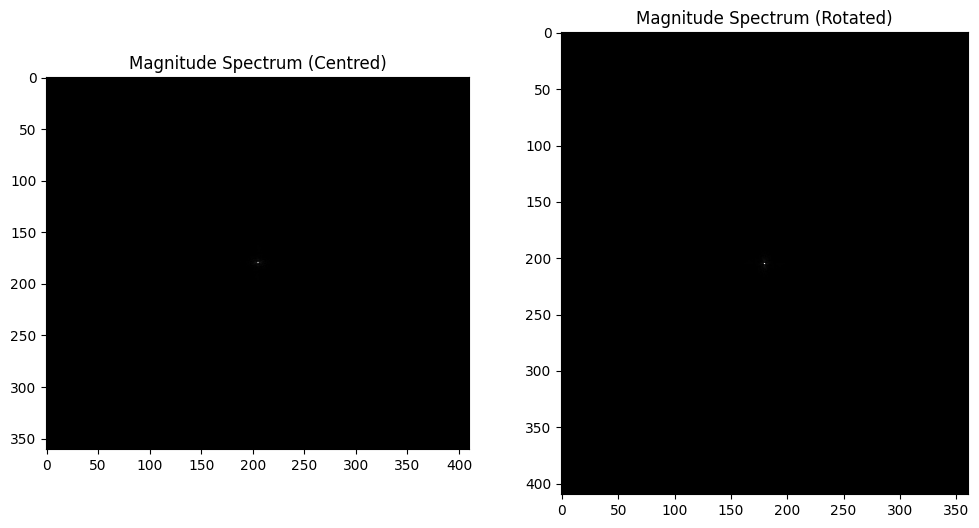

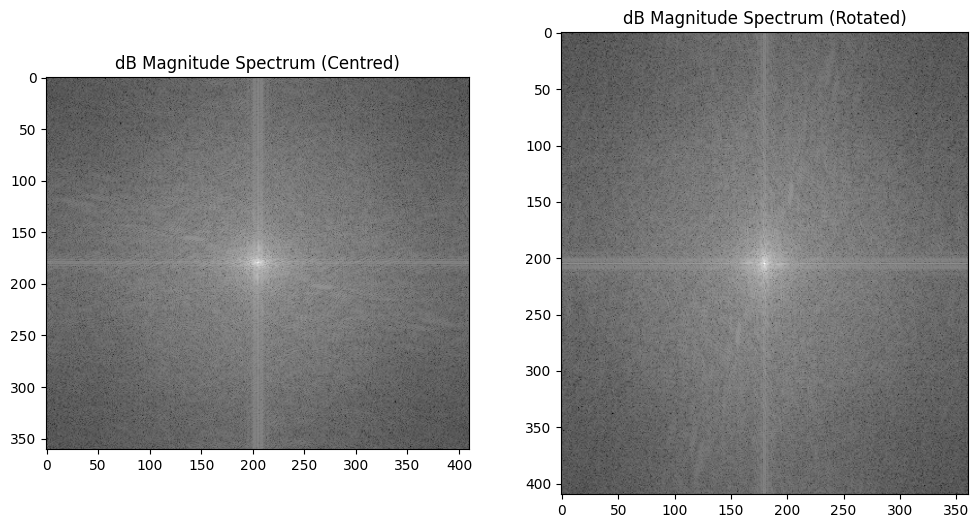

In [102]:
# Rotate image 90 deg anticlockwise
rotated_img = np.rot90(img)

# FFT of rotated image
F_rot = np.fft.fft2(rotated_img)
F_rot_shift = np.fft.fftshift(F_rot)
F_rot_mag = np.abs(F_rot_shift)
F_rot_mag_db = 20 * np.log(F_rot_mag + 1e-10)

plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(F_shift_mag, cmap='gray'); plt.title("Magnitude Spectrum (Centred)")
plt.subplot(122); plt.imshow(F_rot_mag, cmap='gray'); plt.title("Magnitude Spectrum (Rotated)")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(F_shift_mag_db, cmap='gray'); plt.title("dB Magnitude Spectrum (Centred)")
plt.subplot(122); plt.imshow(F_rot_mag_db, cmap='gray'); plt.title("dB Magnitude Spectrum (Rotated)")
plt.show()


In [103]:
def load_and_prepare_image(path, size=None):
    img = Image.open(path).convert('L')
    if size is not None:
        img = img.resize(size, Image.LANCZOS)
    return np.array(img, dtype=np.float32)

In [104]:
def hybrid_image(img1_path, img2_path, sigma_low=8, sigma_high=8, resize_shape=(400, 400)):
    img1 = load_and_prepare_image(img1_path, resize_shape)
    img2 = load_and_prepare_image(img2_path, resize_shape)

    # Low-pass filter
    low_pass = gaussian_filter(img1, sigma=sigma_low)

    # High-pass filter
    img2_blur = gaussian_filter(img2, sigma=sigma_high)
    high_pass = img2 - img2_blur

    # Mix both image
    hybrid = low_pass + high_pass

    # Clip values to valid range for display
    hybrid = np.clip(hybrid, 0, 255)
    low_pass = np.clip(low_pass, 0, 255)
    high_pass = np.clip(high_pass + 126, 0, 255)

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title("Image 1 (Low-pass)")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title("Image 2 (High-pass)")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(hybrid), cmap='gray')
    plt.title("Hybrid Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return hybrid

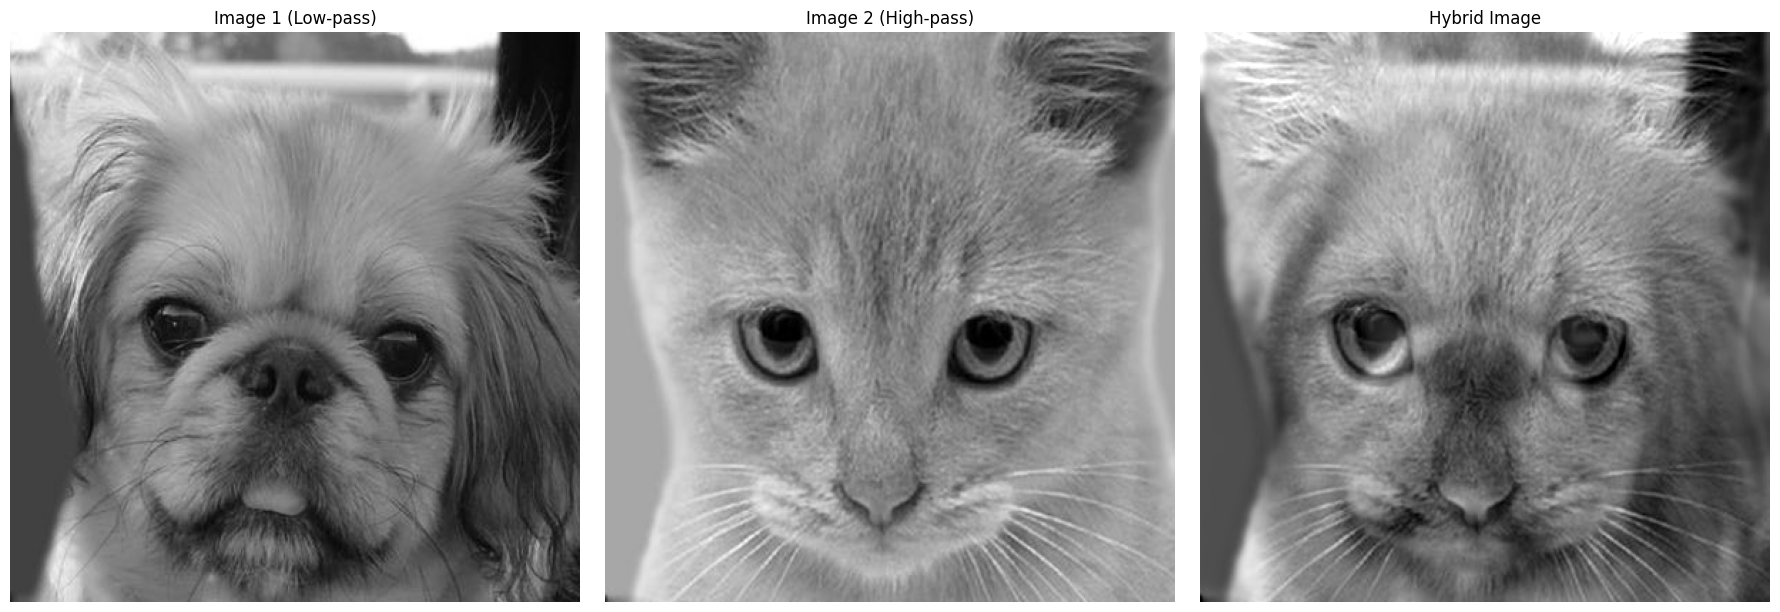

In [105]:
hybrid = hybrid_image('dog_gray.jpg', 'cat_gray.jpg', sigma_low=3, sigma_high=6)

In [106]:
def show_filter_spectra(shape, sigma_low, sigma_high):
    H, W = shape
    y, x = np.indices((H, W))
    cx, cy = W // 2, H // 2
    gaussian_lp = np.exp(-((x - cx)**2 + (y - cy)**2) / (2 * sigma_low**2))
    gaussian_hp = 1 - np.exp(-((x - cx)**2 + (y - cy)**2) / (2 * sigma_high**2))

    # FFT of the filters (to visualize frequency response)
    lp_fft = fftshift(np.abs(fft2(gaussian_lp)))
    hp_fft = fftshift(np.abs(fft2(gaussian_hp)))

    # Normalize for display
    lp_fft = np.log1p(lp_fft)
    hp_fft = np.log1p(hp_fft)

    # Plot spectra
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(lp_fft, cmap='viridis')
    plt.title(f"Low-pass Filter (σ={sigma_low}) Spectrum")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hp_fft, cmap='viridis')
    plt.title(f"High-pass Filter (σ={sigma_high}) Spectrum")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


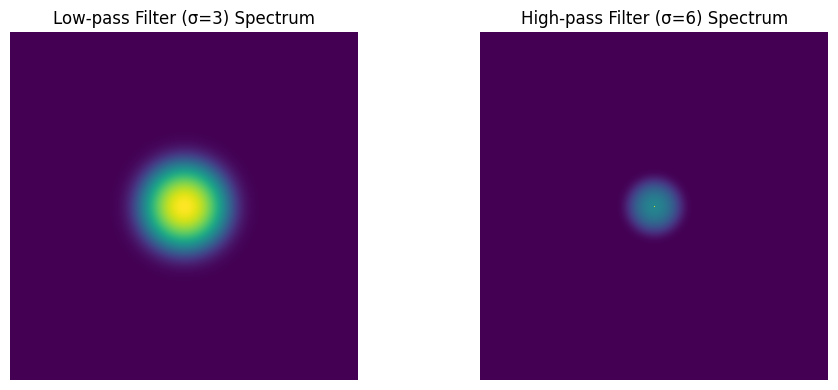

In [107]:
show_filter_spectra(shape = (400, 400), sigma_low = 3, sigma_high = 6)